In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# This function calculates the time to peak mag
def find_mintime(y_vals, x_vals): 
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))

    return x_vals[minmag_index]

# This function finds the magnitude after 3 days (three day mag = tdm)
def find_tdm(x_interp, y_interp, tdm_time):
    good_yvals = np.array([])
    for i, yval in enumerate(y_interp):
        if np.abs(x_interp[i] - tdm_time) < 0.05:
            good_yvals = np.append(good_yvals, yval)
    return np.average(good_yvals)

# This function includes the last non-detection before the first detection
def include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals):
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    y_error = np.array(y_error)
    nd_y_vals = np.array(nd_y_vals)
    nd_x_vals = np.array(nd_x_vals)

    nd_x_before_peak = nd_x_vals[nd_x_vals<x_vals[0]][-1]
    nd_y_before_peak = nd_y_vals[nd_x_vals<x_vals[0]][-1]
    x_vals = np.append(x_vals, nd_x_before_peak)
    y_vals = np.append(y_vals, nd_y_before_peak)

    order = np.argsort(x_vals)
    zero = np.zeros(1)
    y_error = np.append(y_error, zero)
    
    
    return x_vals[order], y_vals[order], y_error[order]

In [6]:
CV_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abppewc_20220603\\detections_ZTF19abppewc.csv")
plotname = CV_1

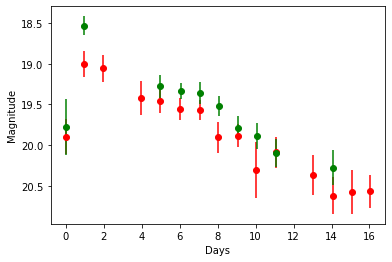

In [7]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time: 13.3874
time: 10.3466


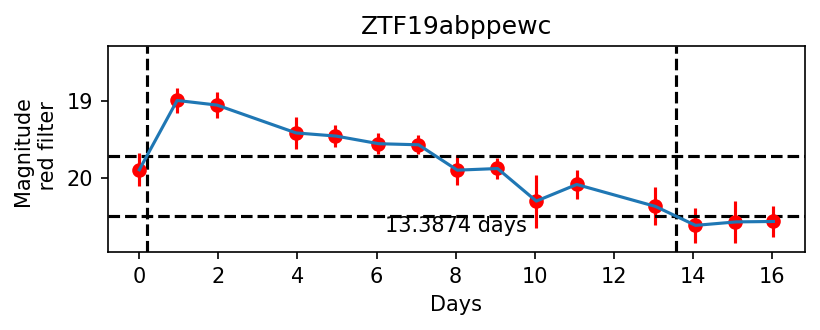

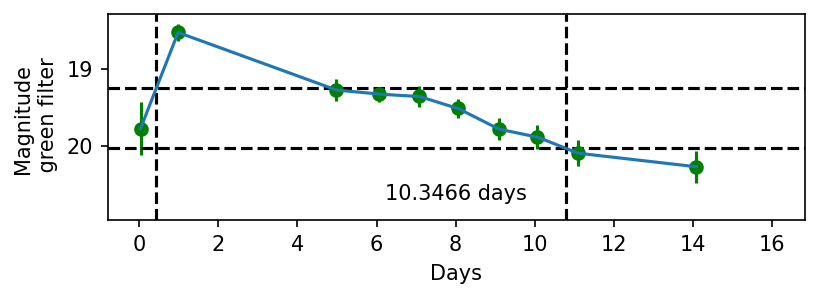

In [29]:
# red filter for CV 1

plotname = CV_1

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + 2.5*np.log10(4)
threequarters = minmag + 2.5*np.log(4/3)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%
def find_onequarter_index(x_interp, y_interp, onequarter):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - onequarter) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

def find_threequarters_index(x_interp, y_interp, threequarters):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - threequarters) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time = onequarter_indexpost - threequarters_indexpre
time = round(time, 4)
print(f'time: {time}')


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='black', ls='--')
ax1.axhline(float(threequarters), c='black', ls='--')
ax1.axvline(float(onequarter_indexpost), c='black', ls='--')
ax1.axvline(float(threequarters_indexpre), c='black', ls='--')
#ax1.axvline(float(threequarters_indexpost), c='black', ls='--')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abppewc')




# Green filter for CV 1




red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + 2.5*np.log10(4)
threequarters = minmag + 2.5*np.log(4/3)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%
def find_onequarter_index(x_interp, y_interp, onequarter):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - onequarter) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

def find_threequarters_index(x_interp, y_interp, threequarters):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - threequarters) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time = onequarter_indexpost - threequarters_indexpre
time = round(time, 4)
print(f'time: {time}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n green filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

ax2.axhline(float(onequarter), c='black', ls='--')
ax2.axhline(float(threequarters), c='black', ls='--')
ax2.axvline(float(onequarter_indexpost), c='black', ls='--')
ax2.axvline(float(threequarters_indexpre), c='black', ls='--')
#ax1.axvline(float(threequarters_indexpost), c='black', ls='--')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [10]:
CV_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18acswirx_20220606\\detections_ZTF18acswirx.csv")
plotname = CV_2

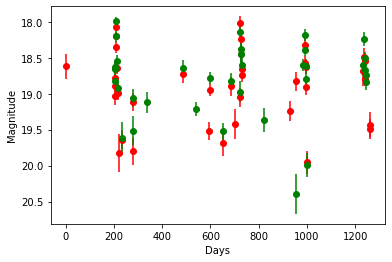

In [11]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

peak mag red: 18.326502
25% of peak red: 19.831651978319908
75% of peak red: 19.045707181129455
time: 61.0272
peak mag green: 18.184113
25% of peak green: 19.689262978319906
75% of peak green: 18.903318181129453
time: 33.4796


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


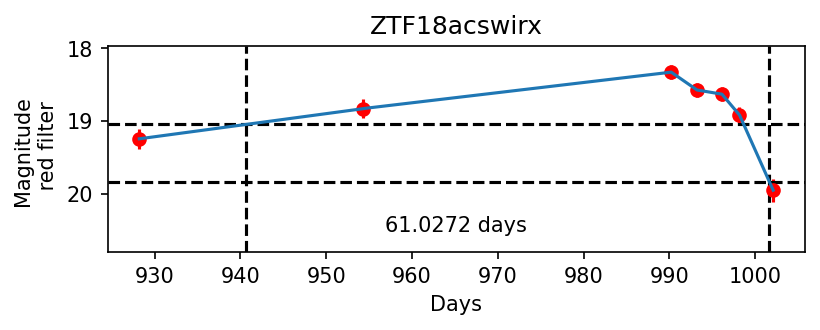

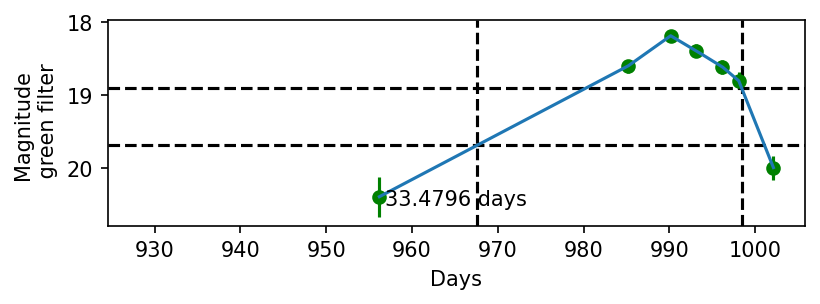

In [34]:
# red filter for CV 2

plotname = CV_2

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 25
finish = 32
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + 2.5*np.log10(4)
threequarters = minmag + 2.5*np.log(4/3)
print(f'peak mag red: {minmag}')
print(f'25% of peak red: {onequarter}')
print(f'75% of peak red: {threequarters}')

# Find index of 25% and 75%
def find_onequarter_index(x_interp, y_interp, onequarter):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - onequarter) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

def find_threequarters_index(x_interp, y_interp, threequarters):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - threequarters) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time = onequarter_indexpost - threequarters_indexpre
time = round(time, 4)
print(f'time: {time}')


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='black', ls='--')
ax1.axhline(float(threequarters), c='black', ls='--')
ax1.axvline(float(onequarter_indexpost), c='black', ls='--')
ax1.axvline(float(threequarters_indexpre), c='black', ls='--')
#ax1.axvline(float(threequarters_indexpost), c='black', ls='--')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18acswirx')



# Green filter for CV 2



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 22
finish = 29
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + 2.5*np.log10(4)
threequarters = minmag + 2.5*np.log(4/3)
print(f'peak mag green: {minmag}')
print(f'25% of peak green: {onequarter}')
print(f'75% of peak green: {threequarters}')

# Find index of 25% and 75%
def find_onequarter_index(x_interp, y_interp, onequarter):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - onequarter) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(f'1/4 index pre {onequarter_indexpre}')
#print(f'1/4 index post {onequarter_indexpost}')

def find_threequarters_index(x_interp, y_interp, threequarters):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - threequarters) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(f'3/4 index pre {threequarters_indexpre}')
#print(f'3/4 index post {threequarters_indexpost}')

# Time between 25% - 75% magnitude
time = onequarter_indexpost - onequarter_indexpre
time = round(time, 4)
print(f'time: {time}')

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n green filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

ax2.axhline(float(onequarter), c='black', ls='--')
ax2.axhline(float(threequarters), c='black', ls='--')
ax2.axvline(float(onequarter_indexpre), c='black', ls='--')
#ax2.axvline(float(onequarter_indexpost), c='black', ls='--')
#ax2.axvline(float(threequarters_indexpre), c='black', ls='--')
ax2.axvline(float(threequarters_indexpost), c='black', ls='--')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()